# Project F7: Floods in India

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/Project /content
drive.flush_and_unmount()


Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/Project': No such file or directory


In [5]:
flood_risk = pd.read_csv('flood_risk_dataset_india.csv')
kerala = pd.read_csv('kerala.csv')
rainfall = pd.read_csv('rainfall_in_india_1901-2015.csv')

## **STEP 1: PRE-CLEANING**

In [ ]:
flood_risk.describe()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,Historical Floods,Flood Occurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


**Note: The dataset "flood_risk" will only be used for visualization and understanding how meteorogical parameters may influence floods. It will not be part of the machine learning process.**

In [ ]:
kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
kerala.columns = kerala.columns.str.replace(' ANNUAL RAINFALL', 'ANNUAL')
kerala.columns = kerala.columns.str.replace(' ANNUAL', 'ANNUAL')
kerala

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [ ]:
kerala.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'FLOODS'],
      dtype='object')

In [ ]:
rainfall.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [ ]:
rainfall = rainfall.drop(['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], axis=1)
rainfall

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0


In [ ]:
rainfall.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [ ]:
rainfall.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')

## **STEP 2: MERGING**

In [ ]:
data = pd.concat([kerala, rainfall], ignore_index = True)
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,NaN
4230,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,NaN
4231,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,NaN
4232,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,NaN


In [ ]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'FLOODS'],
      dtype='object')

In [ ]:
data.shape, data.size

((4234, 16), 67744)

In [ ]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,NaN
4230,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,NaN
4231,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,NaN
4232,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,NaN


In [ ]:
# Checking for missing values #data cleaning
data.isnull().sum().any()

True

In [ ]:
# Checking for duplicate values #data cleaning
data.duplicated().any()

False

## **STEP 3: FIRST OVERVIEW**

In [ ]:
unique_nb_values = data['SUBDIVISION'].nunique()
unique_nb_values

37

In [ ]:
unique_values = data['SUBDIVISION'].unique()
unique_values

array(['KERALA', 'KERALA ', 'ANDAMAN & NICOBAR ISLANDS',
       'ARUNACHAL PRADESH', 'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
# Renaming 'KERALA ' because of the blank space
data['SUBDIVISION'] = data['SUBDIVISION'].replace('KERALA ', 'KERALA')
unique_values

array(['KERALA', 'KERALA ', 'ANDAMAN & NICOBAR ISLANDS',
       'ARUNACHAL PRADESH', 'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'FLOODS'],
      dtype='object')

### **INSIGHT 1:** MEAN, MIN and MAX for each subdivision

In [ ]:
# Group the data by 'SUBDIVISION' and calculate the statistics for 'ANNUAL'
annual_stats = data.groupby('SUBDIVISION')['ANNUAL']

# Calculate the statistics
mean_subdivisions = annual_stats.mean()
median_subdivisions = annual_stats.median()
std_subdivisions = annual_stats.std()
min_subdivisions = annual_stats.min()
max_subdivisions = annual_stats.max()

# Combine all statistics into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean ANNUAL': mean_subdivisions,
    'Median ANNUAL': median_subdivisions,
    'Standard Deviation ANNUAL': std_subdivisions,
    'Min ANNUAL': min_subdivisions,
    'Max ANNUAL': max_subdivisions
}).reset_index()

threshold_mean = summary_stats['Mean ANNUAL'].mean()
threshold_min = summary_stats['Min ANNUAL'].mean()
threshold_max = summary_stats['Max ANNUAL'].mean()
print(f"Threshold MEAN for critical subdivisions: {threshold_mean:.2f}")
print(f"Threshold MIN for critical subdivisions: {threshold_min:.2f}")
print(f"Threshold MAX for critical subdivisions: {threshold_max:.2f}\n")

# Display the resulting DataFrame
summary_stats

Threshold MEAN for critical subdivisions: 1427.50
Threshold MIN for critical subdivisions: 837.38
Threshold MAX for critical subdivisions: 2194.72



,SUBDIVISION,Mean ANNUAL,Median ANNUAL,Standard Deviation ANNUAL,Min ANNUAL,Max ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2927.439423,2956.05,410.070671,1849.4,3938.2
1,ARUNACHAL PRADESH,3418.857143,3354.20,1078.831013,1668.5,6331.1
2,ASSAM & MEGHALAYA,2580.695652,2601.10,310.195411,1743.4,3403.5
3,BIHAR,1197.633913,1207.00,194.643134,629.2,1660.4
4,CHHATTISGARH,1371.728696,1370.40,210.692112,904.6,1974.0
5,COASTAL ANDHRA PRADESH,1052.904348,1026.50,190.383737,703.2,1712.4
6,COASTAL KARNATAKA,3408.409649,3360.70,482.644791,2510.9,5553.9
7,EAST MADHYA PRADESH,1205.000000,1197.10,219.501963,653.8,1747.1
8,EAST RAJASTHAN,655.215652,655.40,166.432887,273.6,1350.4
9,EAST UTTAR PRADESH,979.213043,988.80,203.635351,493.3,1545.5


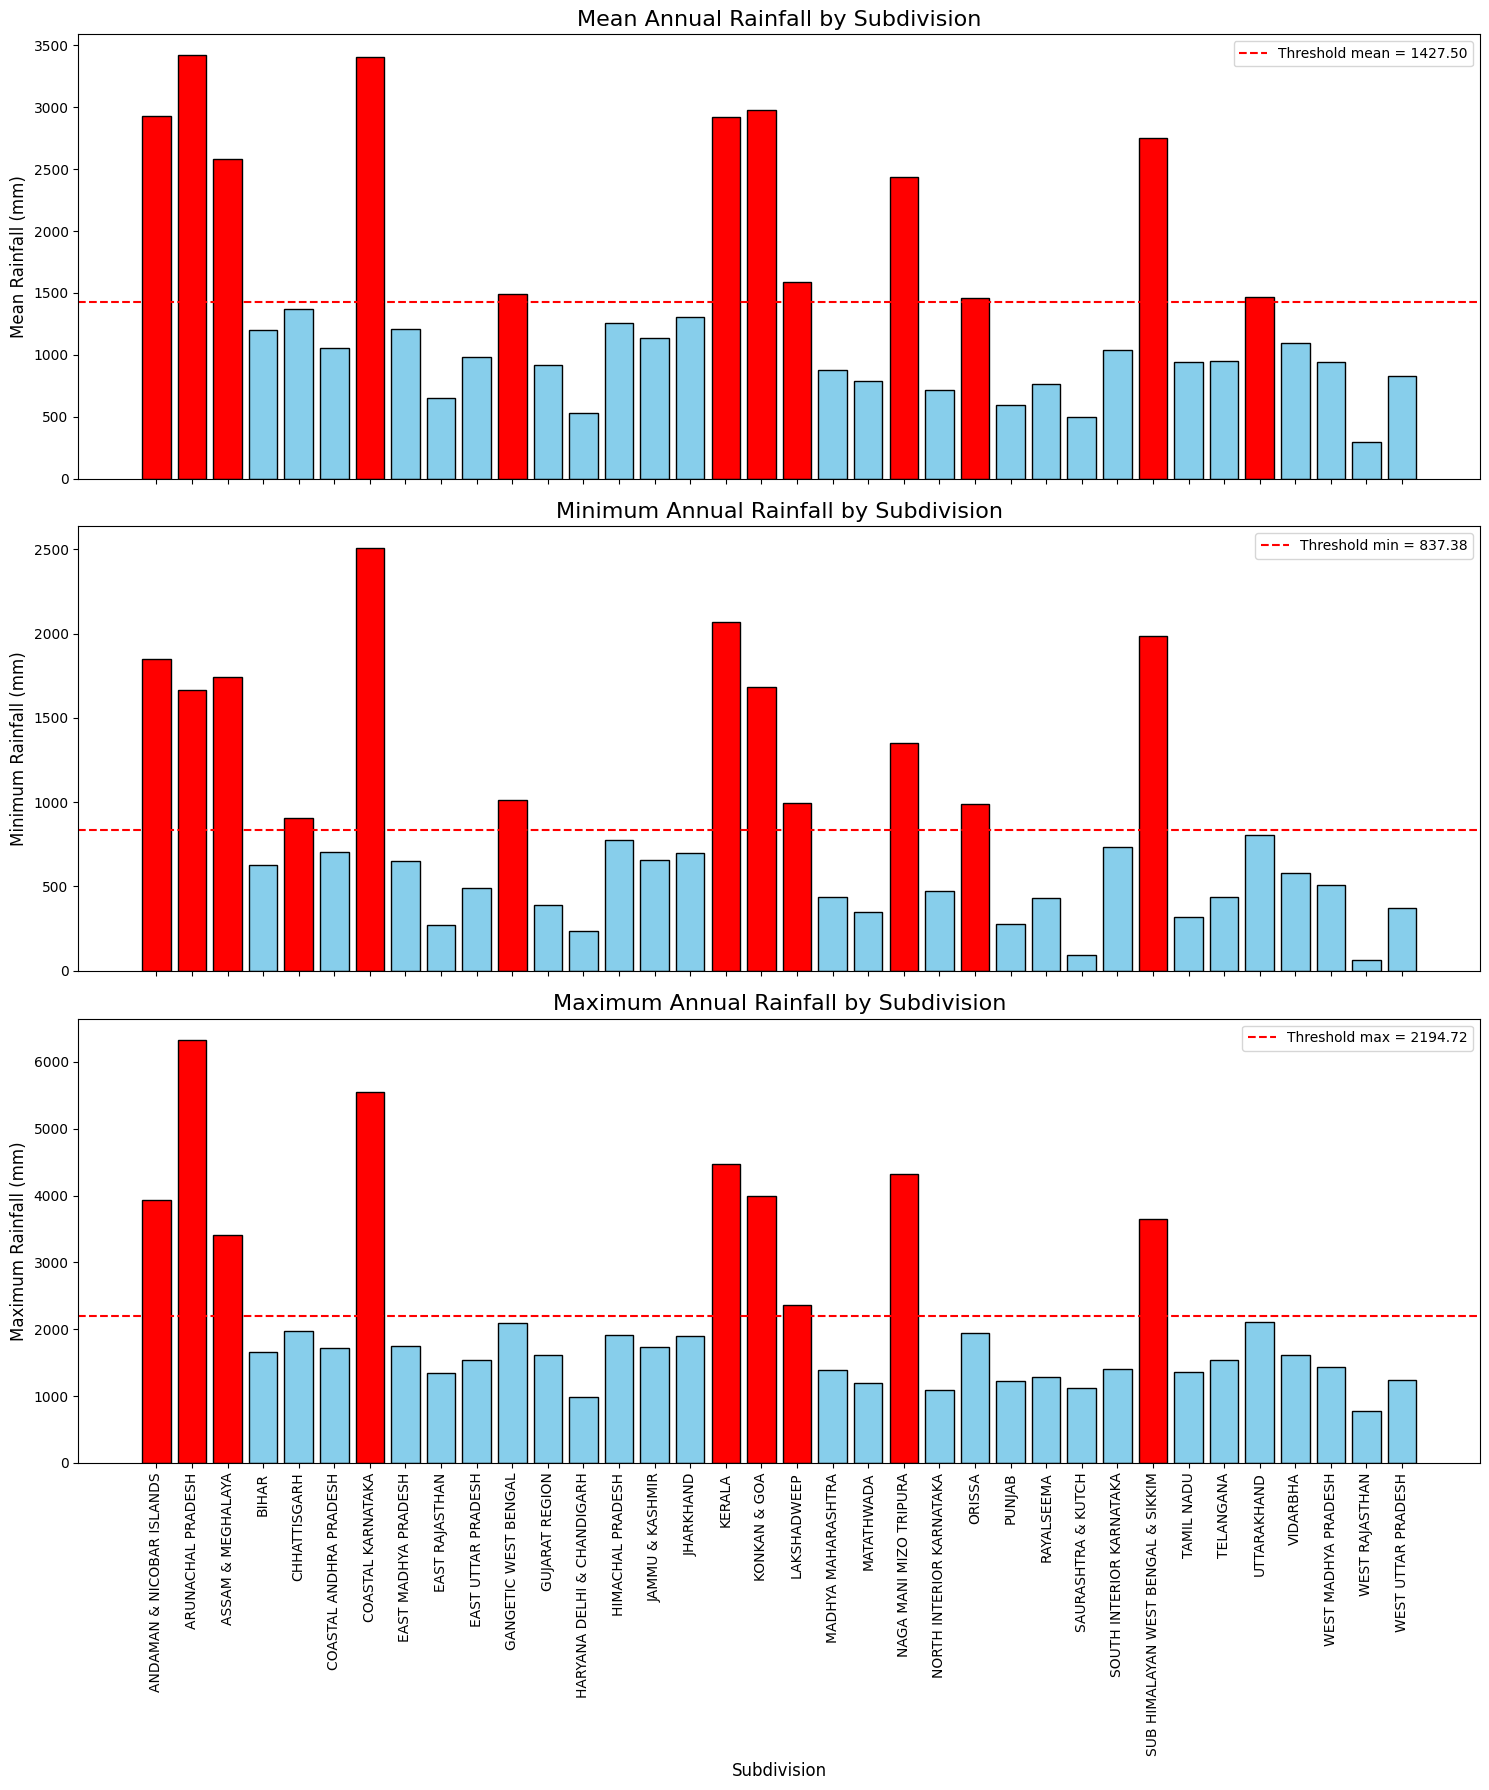

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)

# Create a color list based on the threshold for Mean ANNUAL
colors_mean = ['red' if value > threshold_mean else 'skyblue' for value in summary_stats['Mean ANNUAL']]
colors_min = ['red' if summary_stats['Min ANNUAL'][i] > threshold_min else 'skyblue' for i in range(len(summary_stats))]
colors_max = ['red' if summary_stats['Max ANNUAL'][i] > threshold_max else 'skyblue' for i in range(len(summary_stats))]

# Plot Mean Annual Rainfall
axes[0].bar(summary_stats['SUBDIVISION'], summary_stats['Mean ANNUAL'], color=colors_mean, edgecolor='black')
axes[0].axhline(y=threshold_mean, color='red', linestyle='--', linewidth=1.5, label=f'Threshold mean = {threshold_mean:.2f}')
axes[0].set_title('Mean Annual Rainfall by Subdivision', fontsize=16)
axes[0].set_ylabel('Mean Rainfall (mm)', fontsize=12)

# Plot Min Annual Rainfall
axes[1].bar(summary_stats['SUBDIVISION'], summary_stats['Min ANNUAL'], color=colors_min, edgecolor='black')
axes[1].axhline(y=threshold_min, color='red', linestyle='--', linewidth=1.5, label=f'Threshold min = {threshold_min:.2f}')
axes[1].set_title('Minimum Annual Rainfall by Subdivision', fontsize=16)
axes[1].set_ylabel('Minimum Rainfall (mm)', fontsize=12)

# Plot Max Annual Rainfall
axes[2].bar(summary_stats['SUBDIVISION'], summary_stats['Max ANNUAL'], color=colors_max, edgecolor='black')
axes[2].axhline(y=threshold_max, color='red', linestyle='--', linewidth=1.5, label=f'Threshold max = {threshold_max:.2f}')
axes[2].set_title('Maximum Annual Rainfall by Subdivision', fontsize=16)
axes[2].set_xlabel('Subdivision', fontsize=12)
axes[2].set_ylabel('Maximum Rainfall (mm)', fontsize=12)

# Customize x-axis labels for readability
plt.xticks(rotation=90, fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()
axes[0].legend()  # Add legend only to the first plot
axes[1].legend()
axes[2].legend()

# Display the plot
plt.show()


In [ ]:
# Subdivisions above the threshold for Mean Annual Rainfall
mean_above_threshold = summary_stats[summary_stats['Mean ANNUAL'] > threshold_mean]['SUBDIVISION']
print("Subdivisions above the threshold for Mean Annual Rainfall:\n")
print(mean_above_threshold)

# Subdivisions above the threshold for Min Annual Rainfall
min_above_threshold = summary_stats[summary_stats['Min ANNUAL'] > threshold_min]['SUBDIVISION']
print("\nSubdivisions above the threshold for Minimum Annual Rainfall:\n")
print(min_above_threshold)

# Subdivisions above the threshold for Max Annual Rainfall
max_above_threshold = summary_stats[summary_stats['Max ANNUAL'] > threshold_max]['SUBDIVISION']
print("\nSubdivisions above the threshold for Maximum Annual Rainfall:\n")
print(max_above_threshold)

# Subdivisions above the threshold for Mean Annual Rainfall
mean_above_threshold = set(summary_stats[summary_stats['Mean ANNUAL'] > threshold_mean]['SUBDIVISION'])
min_above_threshold = set(summary_stats[summary_stats['Min ANNUAL'] > threshold_min]['SUBDIVISION'])
max_above_threshold = set(summary_stats[summary_stats['Max ANNUAL'] > threshold_max]['SUBDIVISION'])

# Find the intersection of all three sets to identify critical subdivisions
critical_subdivisions = mean_above_threshold.intersection(min_above_threshold, max_above_threshold)

# Display the list of critical subdivisions
print("\nCritical Subdivisions (above the threshold for Mean, Min, and Max Annual Rainfall):")
critical_subdivisions



Subdivisions above the threshold for Mean Annual Rainfall:

0              ANDAMAN & NICOBAR ISLANDS
1                      ARUNACHAL PRADESH
2                      ASSAM & MEGHALAYA
6                      COASTAL KARNATAKA
10                  GANGETIC WEST BENGAL
16                                KERALA
17                          KONKAN & GOA
18                           LAKSHADWEEP
21                NAGA MANI MIZO TRIPURA
23                                ORISSA
28    SUB HIMALAYAN WEST BENGAL & SIKKIM
31                           UTTARAKHAND
Name: SUBDIVISION, dtype: object

Subdivisions above the threshold for Minimum Annual Rainfall:

0              ANDAMAN & NICOBAR ISLANDS
1                      ARUNACHAL PRADESH
2                      ASSAM & MEGHALAYA
4                           CHHATTISGARH
6                      COASTAL KARNATAKA
10                  GANGETIC WEST BENGAL
16                                KERALA
17                          KONKAN & GOA
18                     

{'ANDAMAN & NICOBAR ISLANDS',
 'ARUNACHAL PRADESH',
 'ASSAM & MEGHALAYA',
 'COASTAL KARNATAKA',
 'KERALA',
 'KONKAN & GOA',
 'LAKSHADWEEP',
 'NAGA MANI MIZO TRIPURA',
 'SUB HIMALAYAN WEST BENGAL & SIKKIM'}

## Location of the critical subdivisions:


*   SUB HIMALAYAN WEST BENGAL & SIKKIM: NE
*   ANDAMAN & NICOBAR ISLANDS: SE
*   NAGA MANI MIZO TRIPURA: E
*   KONKAN & GOA: SW
*   LAKSHADWEEP: SW
*   COASTAL KARNATAKA: SW
*   KERALA: S
*   ASSAM & MEGHALAYA: NE
*   ARUNACHAL PRADESH: NE



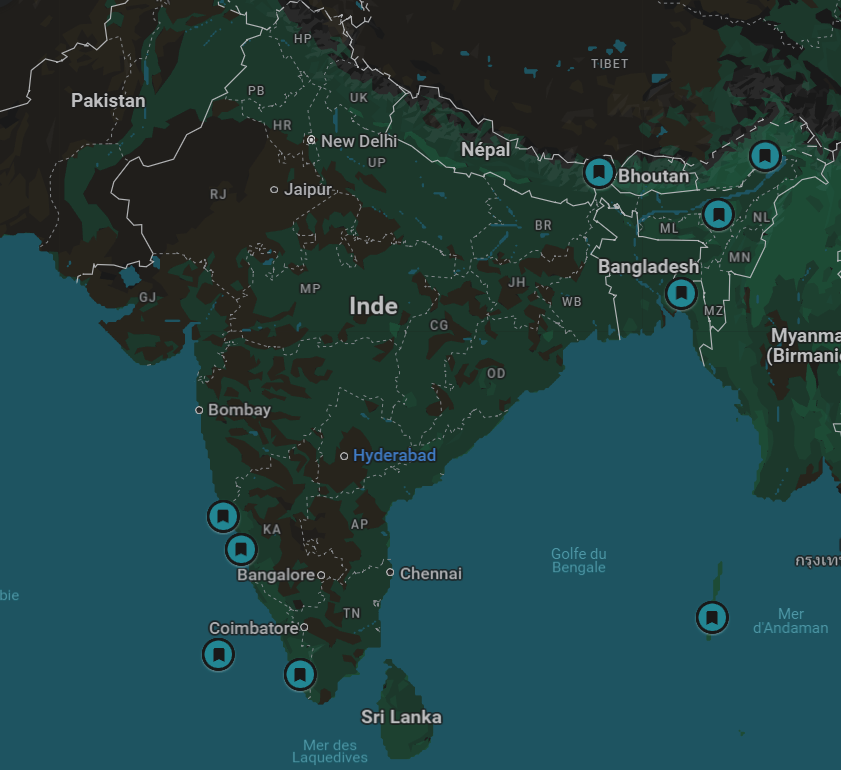

In [ ]:
from IPython.display import Image
Image(filename='Project/critical_subdivisions_in_india.png')

## **ANALYSIS**

After pinning the locations of the criticial subdivisions on Google Maps, we can observe that they all are located on the diagonal South-West, North-East of the country. This confirms what we expected with the “Indian monsoon” phenomenon.

**REMINDER:** "*In India, the wind blows from the **northeast** during cooler months and reverses direction to blow from the **southwest** during the warmest months of the year*".

### **INSIGHT 2:** Annual precipitations since 1900 for each subdivision

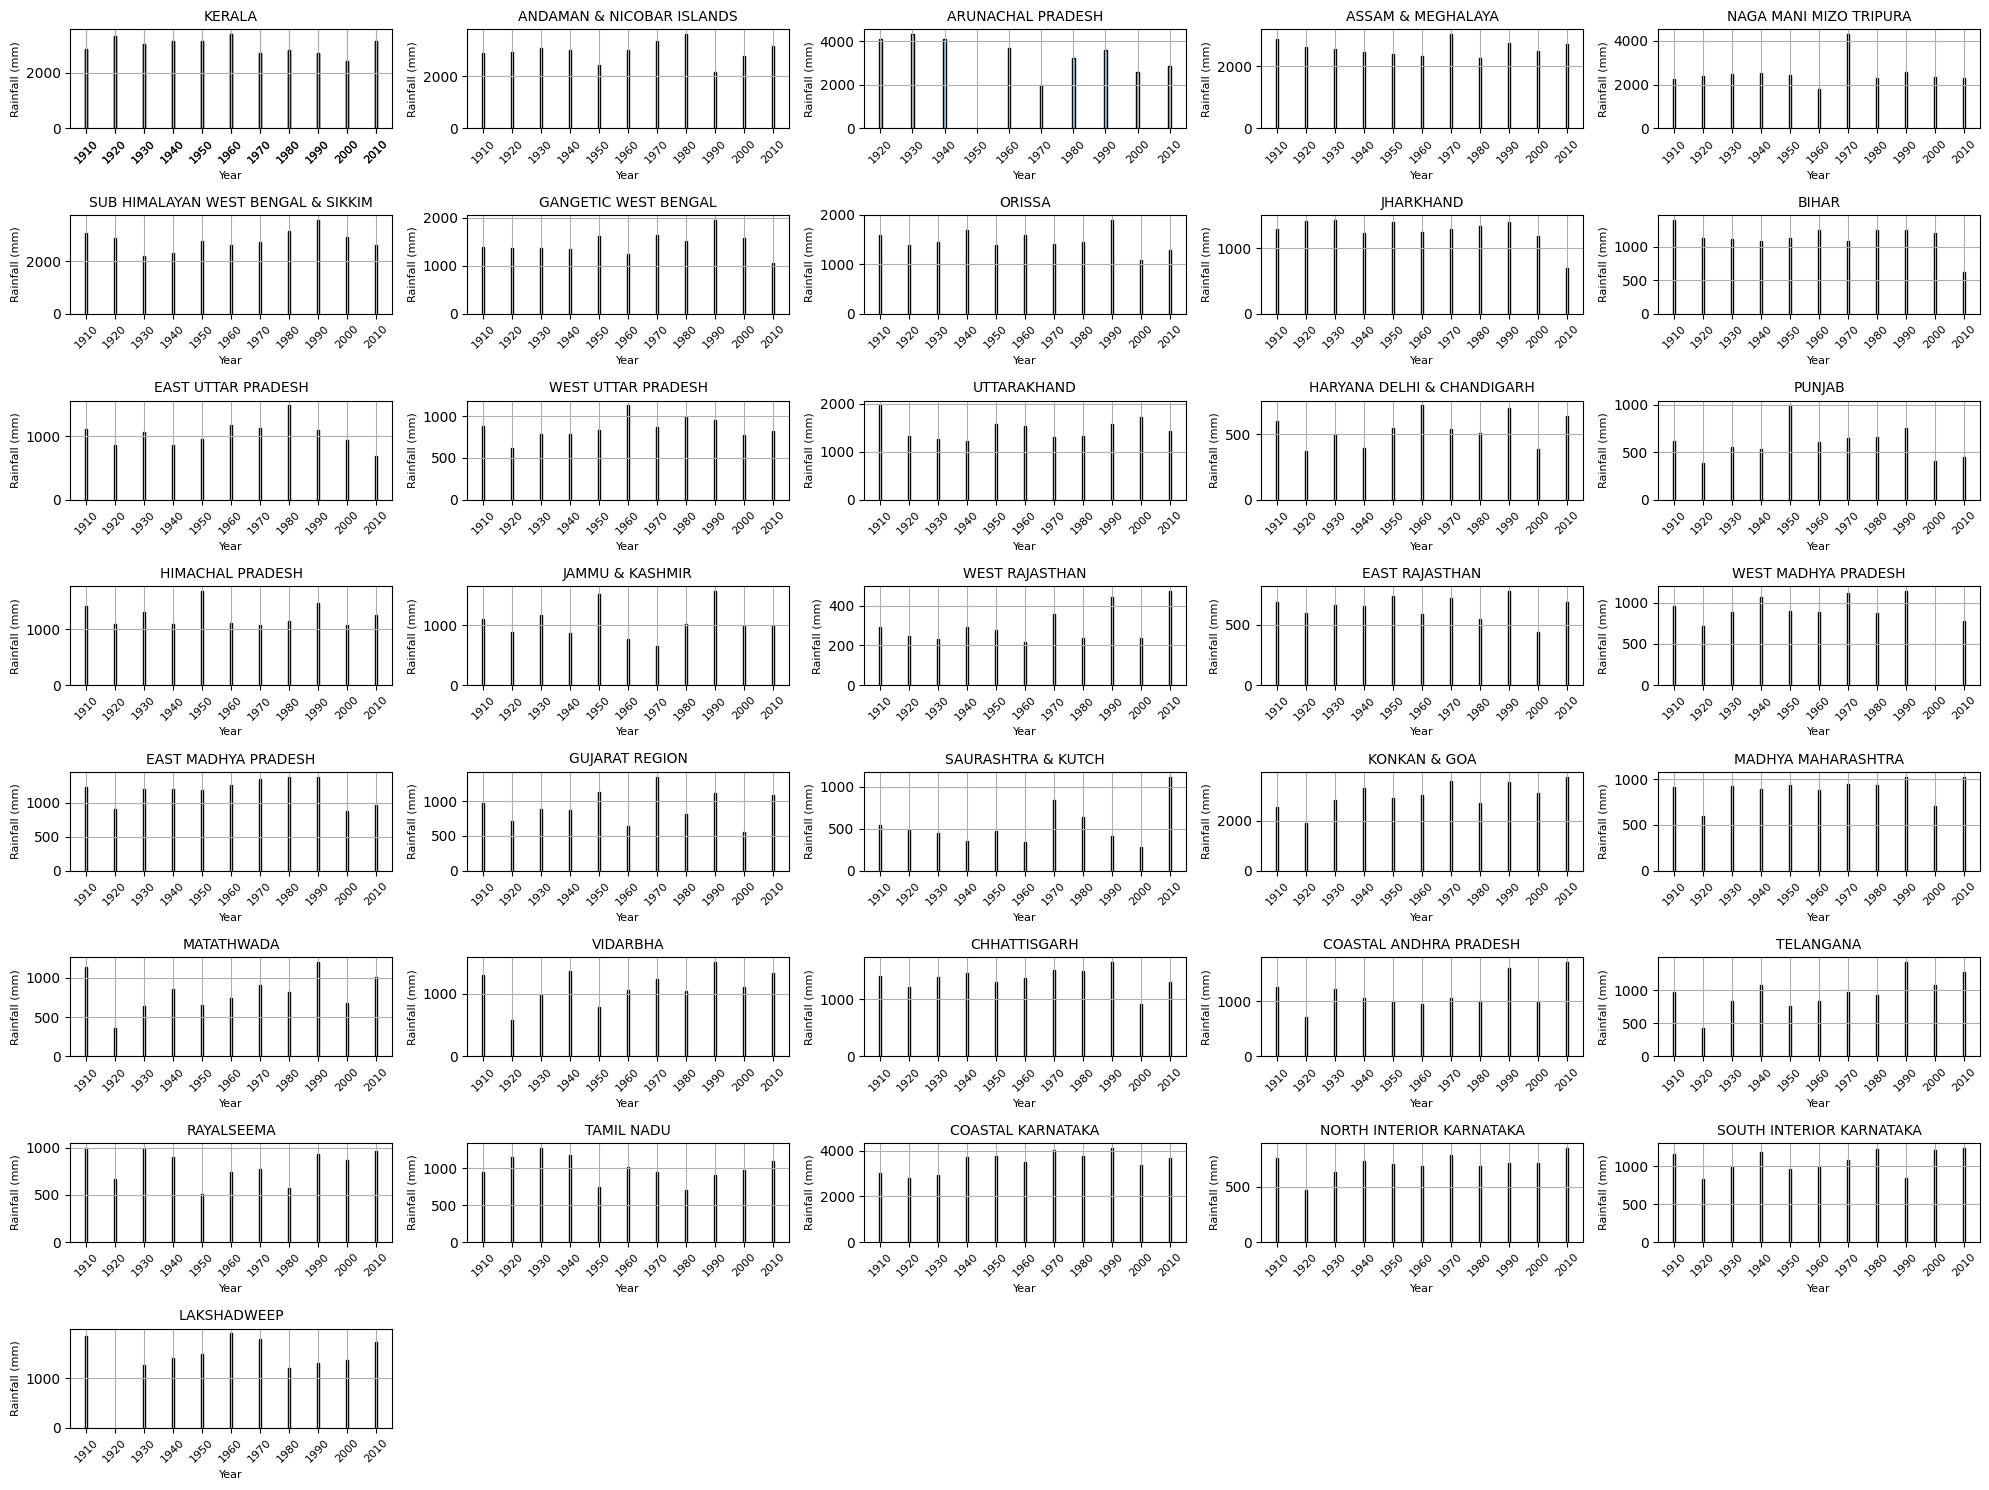

In [ ]:
import math

# Get unique subdivisions
subdivisions = data['SUBDIVISION'].unique()

# Define the number of rows and columns for the grid layout
num_subdivisions = len(subdivisions)
cols = 5  # Number of columns in the grid
rows = math.ceil(num_subdivisions / cols)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data for each subdivision
for idx, subdivision in enumerate(subdivisions):
    ax = axes[idx]  # Select the correct subplot
    # Filter data for the current subdivision
    subdivision_data = data[data['SUBDIVISION'] == subdivision]

    # Filter data to display every 10 years
    subdivision_data = subdivision_data[subdivision_data['YEAR'] % 10 == 0]

    # Plot bar graph for the subdivision
    ax.bar(subdivision_data['YEAR'], subdivision_data['ANNUAL'], color='skyblue', edgecolor='black')

    # Customize the subplot
    ax.set_title(subdivision, fontsize=10)
    ax.set_xlabel('Year', fontsize=8)
    ax.set_ylabel('Rainfall (mm)', fontsize=8)
    ax.grid(True)

    # Adjust x-axis labels to display only every 10th year for readability
    ax.set_xticks(subdivision_data['YEAR'])
    ax.set_xticklabels(subdivision_data['YEAR'], rotation=45, fontsize=8)

# Remove any unused subplots
for ax in axes[num_subdivisions:]:
    ax.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of bar plots
plt.show()


## **PREMILINARY OBSERVATION**

According to the graphs, we can see that the annual precipitations in the country seam to be relatively steady since 1900. This observation is quite surprising, because we could expect that the global warming would raise the total amount of rainfall over the years.<br><br>

Now, let's plot the graphs for the crticial subdivisions for every year, in order to see if something changes for these particular areas.

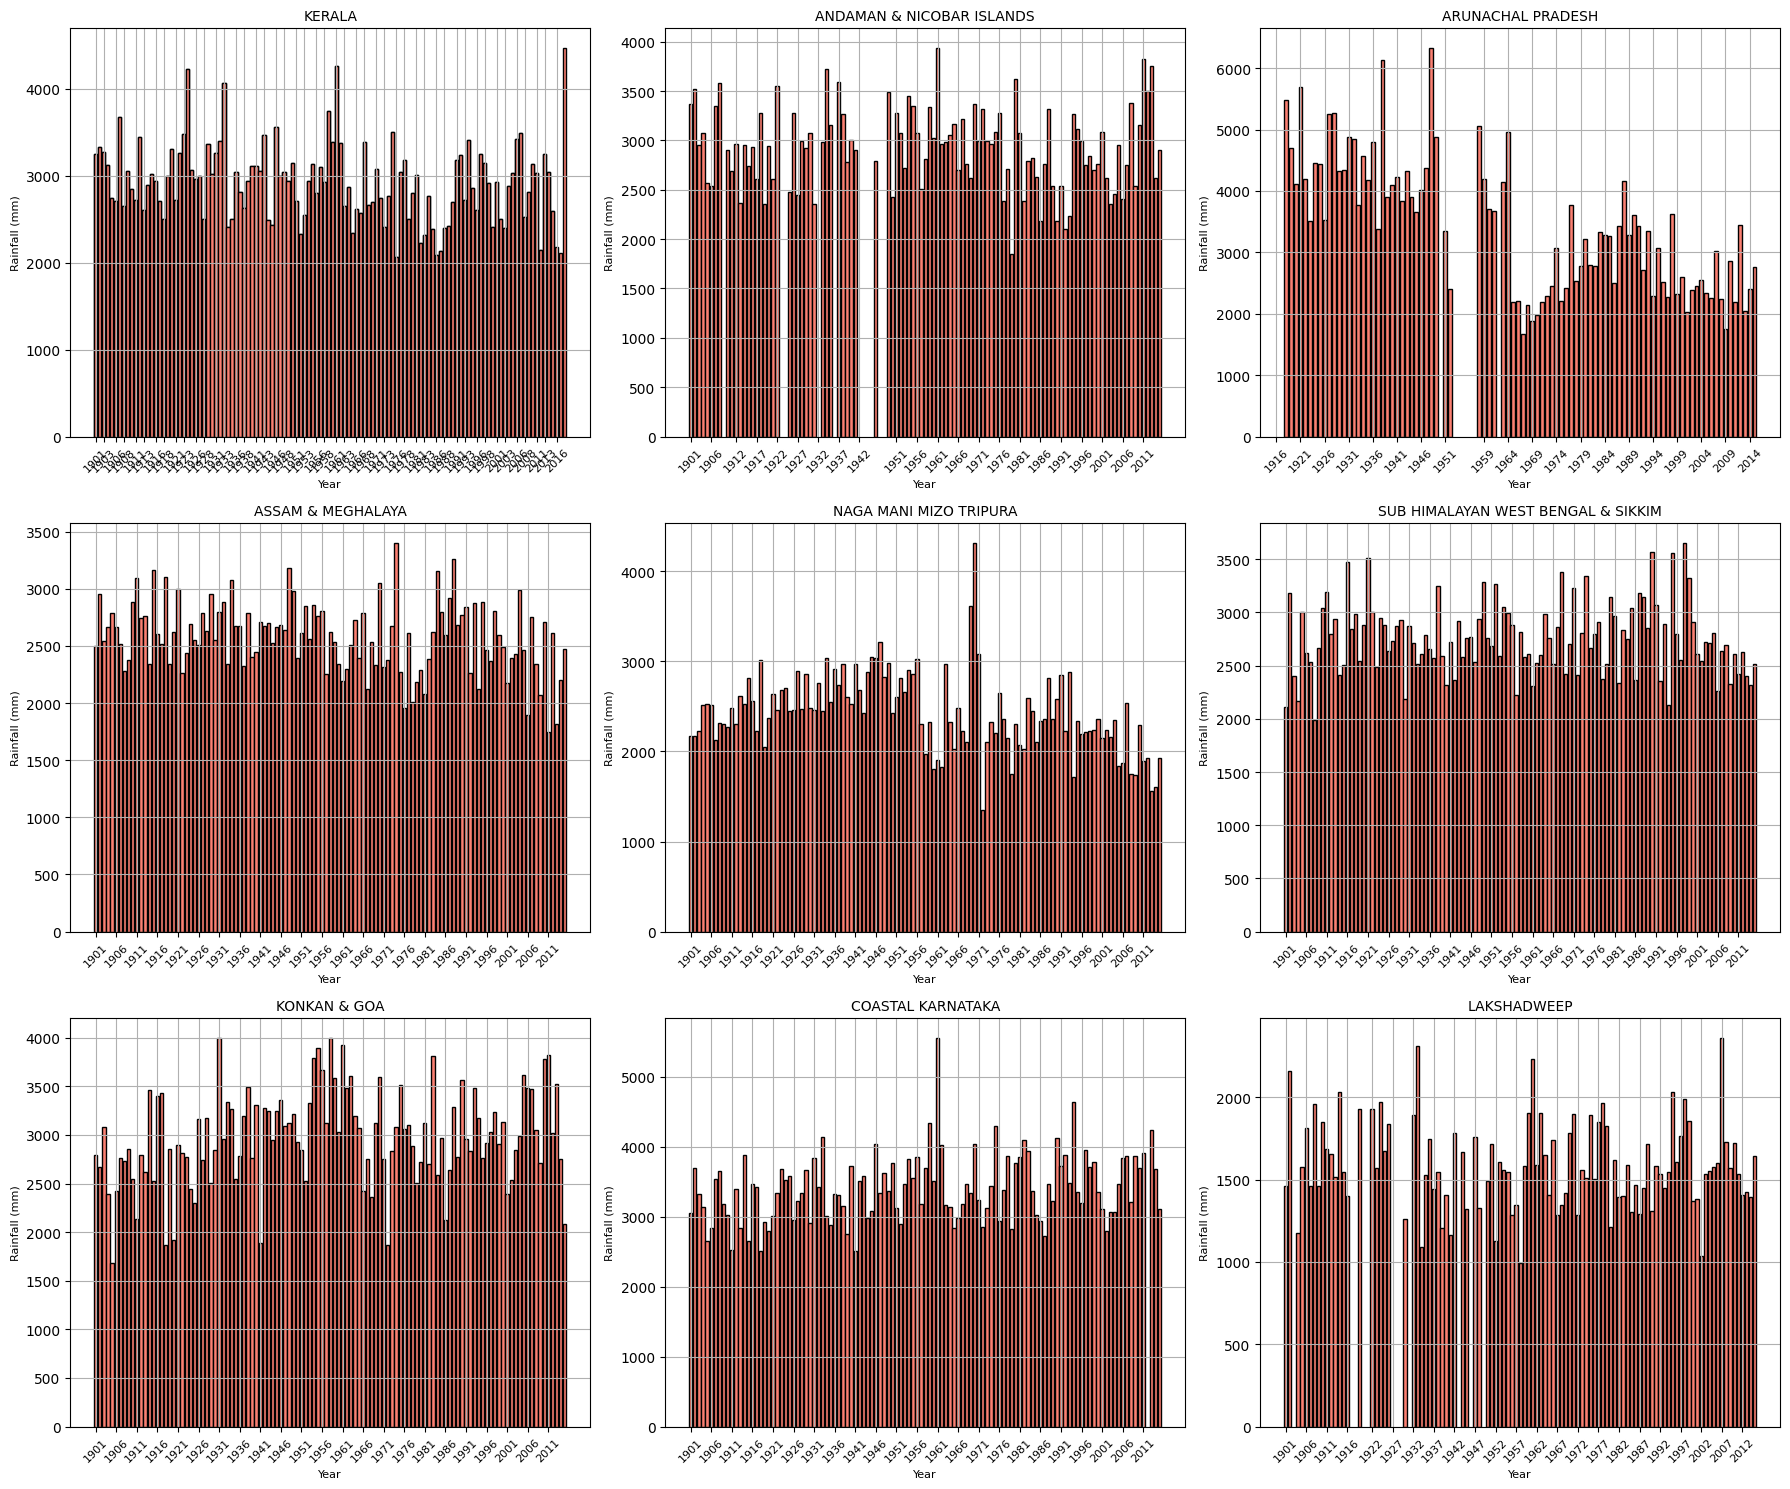

In [ ]:
# Filter the data to include only the critical subdivisions
critical_data = data[data['SUBDIVISION'].isin(critical_subdivisions)]

# Get the unique critical subdivisions
critical_subdivisions_list = critical_data['SUBDIVISION'].unique()

# Define the number of rows and columns for the grid layout
num_critical_subdivisions = len(critical_subdivisions_list)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_critical_subdivisions / cols)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data for each critical subdivision
for idx, subdivision in enumerate(critical_subdivisions_list):
    ax = axes[idx]  # Select the correct subplot
    # Filter data for the current critical subdivision
    subdivision_data = critical_data[critical_data['SUBDIVISION'] == subdivision]

    # Plot bar graph for the subdivision
    ax.bar(subdivision_data['YEAR'], subdivision_data['ANNUAL'], color='salmon', edgecolor='black')

    # Customize the subplot
    ax.set_title(subdivision, fontsize=10)
    ax.set_xlabel('Year', fontsize=8)
    ax.set_ylabel('Rainfall (mm)', fontsize=8)
    ax.grid(True)

    # Adjust x-axis labels to make them readable
    ax.set_xticks(subdivision_data['YEAR'][::5])  # Show every 5th year for better readability
    ax.set_xticklabels(subdivision_data['YEAR'][::5], rotation=45, fontsize=8)

# Remove any unused subplots
for ax in axes[num_critical_subdivisions:]:
    ax.remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of bar plots
plt.show()


## **FINAL OBSERVATION**

Even in the criticial areas, the annual precipitations seem to remain over the years. Therefore, we cannot affirm now that the global warming is the only event that affects rainfalls. Yet, this argument is often claimed by newspapers: "*Many factors contribute to flooding, but experts say climate change caused by global warming makes extreme rainfall more likely."* [https://www.bbc.com/news/world-asia-india-66184551](https://www.bbc.com/news/world-asia-india-66184551)

## **STEP 4: ANALYSING** *flood_risk.csv* **dataset.**

In [ ]:
flood_risk.head(10)

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0
5,12.523841,93.105329,221.571312,36.006300,39.380945,2973.137417,6.969483,7433.062836,Agricultural,Loam,5377.538809,0,0,1
6,9.684425,68.931178,288.362370,39.766935,40.436802,536.326451,5.675580,8661.324855,Water Body,Silt,6039.090369,0,0,1
7,33.119108,86.672170,34.964006,27.209131,56.457308,3157.919948,4.864941,6681.891487,Agricultural,Clay,3994.453680,0,1,1
8,25.432335,90.125517,212.870315,35.607657,60.765855,1867.752445,2.027741,7287.016909,Forest,Silt,6782.941225,0,0,0
9,28.534105,90.025111,69.103247,24.096044,44.710337,1670.948749,8.754557,5490.188075,Urban,Silt,2270.032224,0,1,0


In [ ]:
flood_risk = flood_risk.drop(['Historical Floods'], axis=1)
flood_risk

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,1


In [ ]:
import numpy as np

# INDIA COORDINATES #

  # Lowest Lattitude: 8.079085
  # Highest Lattitude: 33.118390
  # Lowest Longitude: 72.668906
  # Highest Longitude: 96.166023

# Define the grid size
lat_grid_size = 2.0  # 2° for latitude
lon_grid_size = 3.0  # 3° for longitude

# Calculate the grid cell ID for each point
flood_risk['Lat_Cluster'] = (flood_risk['Latitude'] // lat_grid_size).astype(int)
flood_risk['Lon_Cluster'] = (flood_risk['Longitude'] // lon_grid_size).astype(int)

# Combine Lat_Cluster and Lon_Cluster to create unique cluster IDs
flood_risk['Cluster'] = (flood_risk['Lat_Cluster'].astype(str) + "_" +
                         flood_risk['Lon_Cluster'].astype(str))

# Sort by the new cluster column
flood_risk = flood_risk.sort_values(by='Cluster')

# Display the first few rows
flood_risk.head(30)



,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred,Lat_Cluster,Lon_Cluster,Cluster
6452,20.479952,68.627612,280.167755,17.450462,60.803106,4592.386164,9.066399,1368.955288,Water Body,Loam,8264.722511,0,1,10,22,10_22
5066,21.768301,68.842157,116.583918,35.059816,87.273796,2230.143035,5.138122,2998.314282,Agricultural,Sandy,3288.991015,1,0,10,22,10_22
4432,21.777606,68.611339,47.596551,41.664805,32.145119,2918.095872,5.712817,8696.246511,Urban,Sandy,5085.050176,1,1,10,22,10_22
1770,21.323956,68.242142,107.019398,38.680155,72.982903,3582.134943,9.372101,4431.577579,Urban,Loam,2577.687719,1,1,10,22,10_22
6289,21.114238,68.501525,239.212612,39.370744,26.189313,4926.061261,4.440797,2154.722822,Forest,Clay,6919.901040,0,1,10,22,10_22
3811,21.279941,68.268027,154.795226,36.887954,55.699309,4812.286524,3.618032,6226.821603,Urban,Silt,9058.584753,1,1,10,22,10_22
9505,21.446598,68.028971,108.306619,40.572910,84.850751,1066.830481,9.843398,1634.148291,Agricultural,Peat,9150.807054,0,1,10,22,10_22
2146,21.318691,68.819676,87.285128,44.774840,26.248835,1352.249443,2.602270,8198.255356,Forest,Clay,2311.876596,0,0,10,22,10_22
1927,21.948214,68.609719,270.825304,43.501795,72.421249,4456.958241,5.343070,6855.306675,Forest,Sandy,785.371212,1,1,10,22,10_22
9323,20.433029,68.762539,297.169462,33.921410,90.487684,2511.643908,8.378195,4392.066695,Forest,Peat,8508.809733,1,1,10,22,10_22


In [ ]:
nb_clusters = flood_risk['Cluster'].nunique()
print(nb_clusters)
name_clusters = flood_risk['Cluster'].unique()
name_clusters

165


array(['10_22', '10_23', '10_24', '10_25', '10_26', '10_27', '10_28',
       '10_29', '10_30', '10_31', '10_32', '11_22', '11_23', '11_24',
       '11_25', '11_26', '11_27', '11_28', '11_29', '11_30', '11_31',
       '11_32', '12_22', '12_23', '12_24', '12_25', '12_26', '12_27',
       '12_28', '12_29', '12_30', '12_31', '12_32', '13_22', '13_23',
       '13_24', '13_25', '13_26', '13_27', '13_28', '13_29', '13_30',
       '13_31', '13_32', '14_22', '14_23', '14_24', '14_25', '14_26',
       '14_27', '14_28', '14_29', '14_30', '14_31', '14_32', '15_22',
       '15_23', '15_24', '15_25', '15_26', '15_27', '15_28', '15_29',
       '15_30', '15_31', '15_32', '16_22', '16_23', '16_24', '16_25',
       '16_26', '16_27', '16_28', '16_29', '16_30', '16_31', '16_32',
       '17_22', '17_23', '17_24', '17_25', '17_26', '17_27', '17_28',
       '17_29', '17_30', '17_31', '17_32', '18_22', '18_23', '18_24',
       '18_25', '18_26', '18_27', '18_28', '18_29', '18_30', '18_31',
       '18_32', '4_2

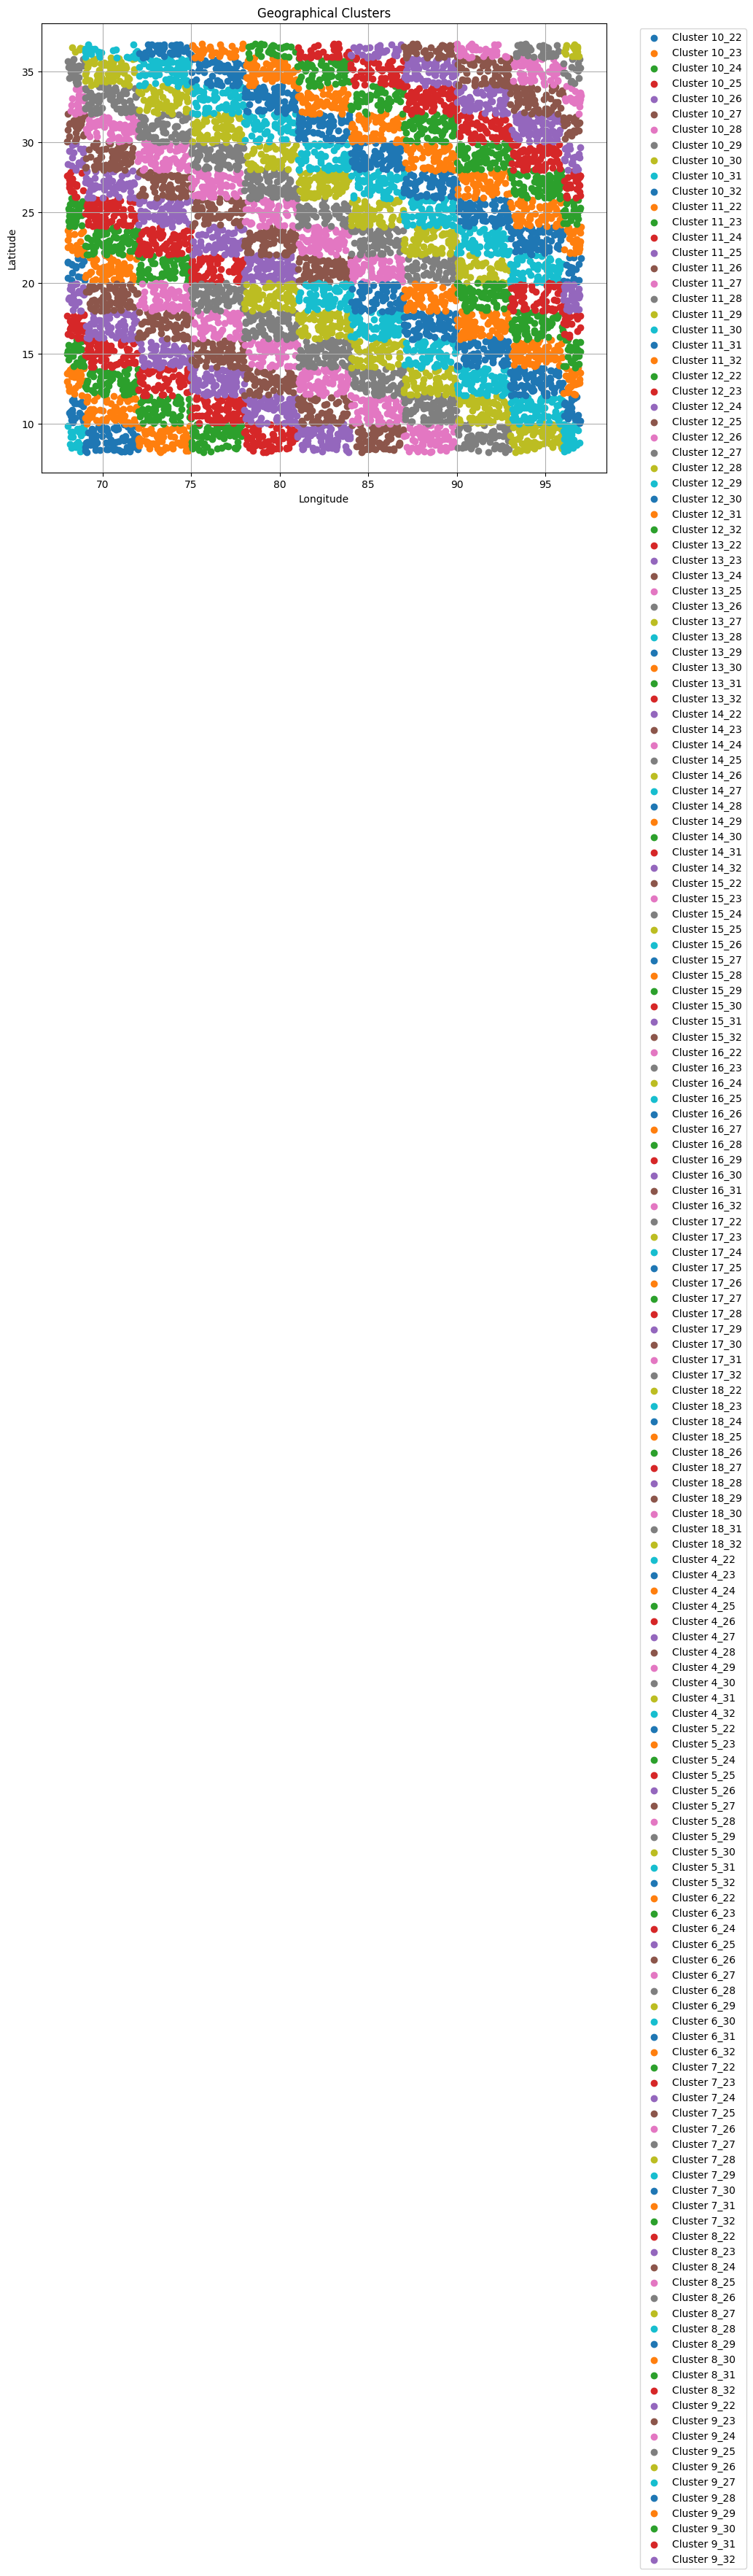

In [ ]:

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster_id in flood_risk['Cluster'].unique():
    cluster_data = flood_risk[flood_risk['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}')

plt.title('Geographical Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


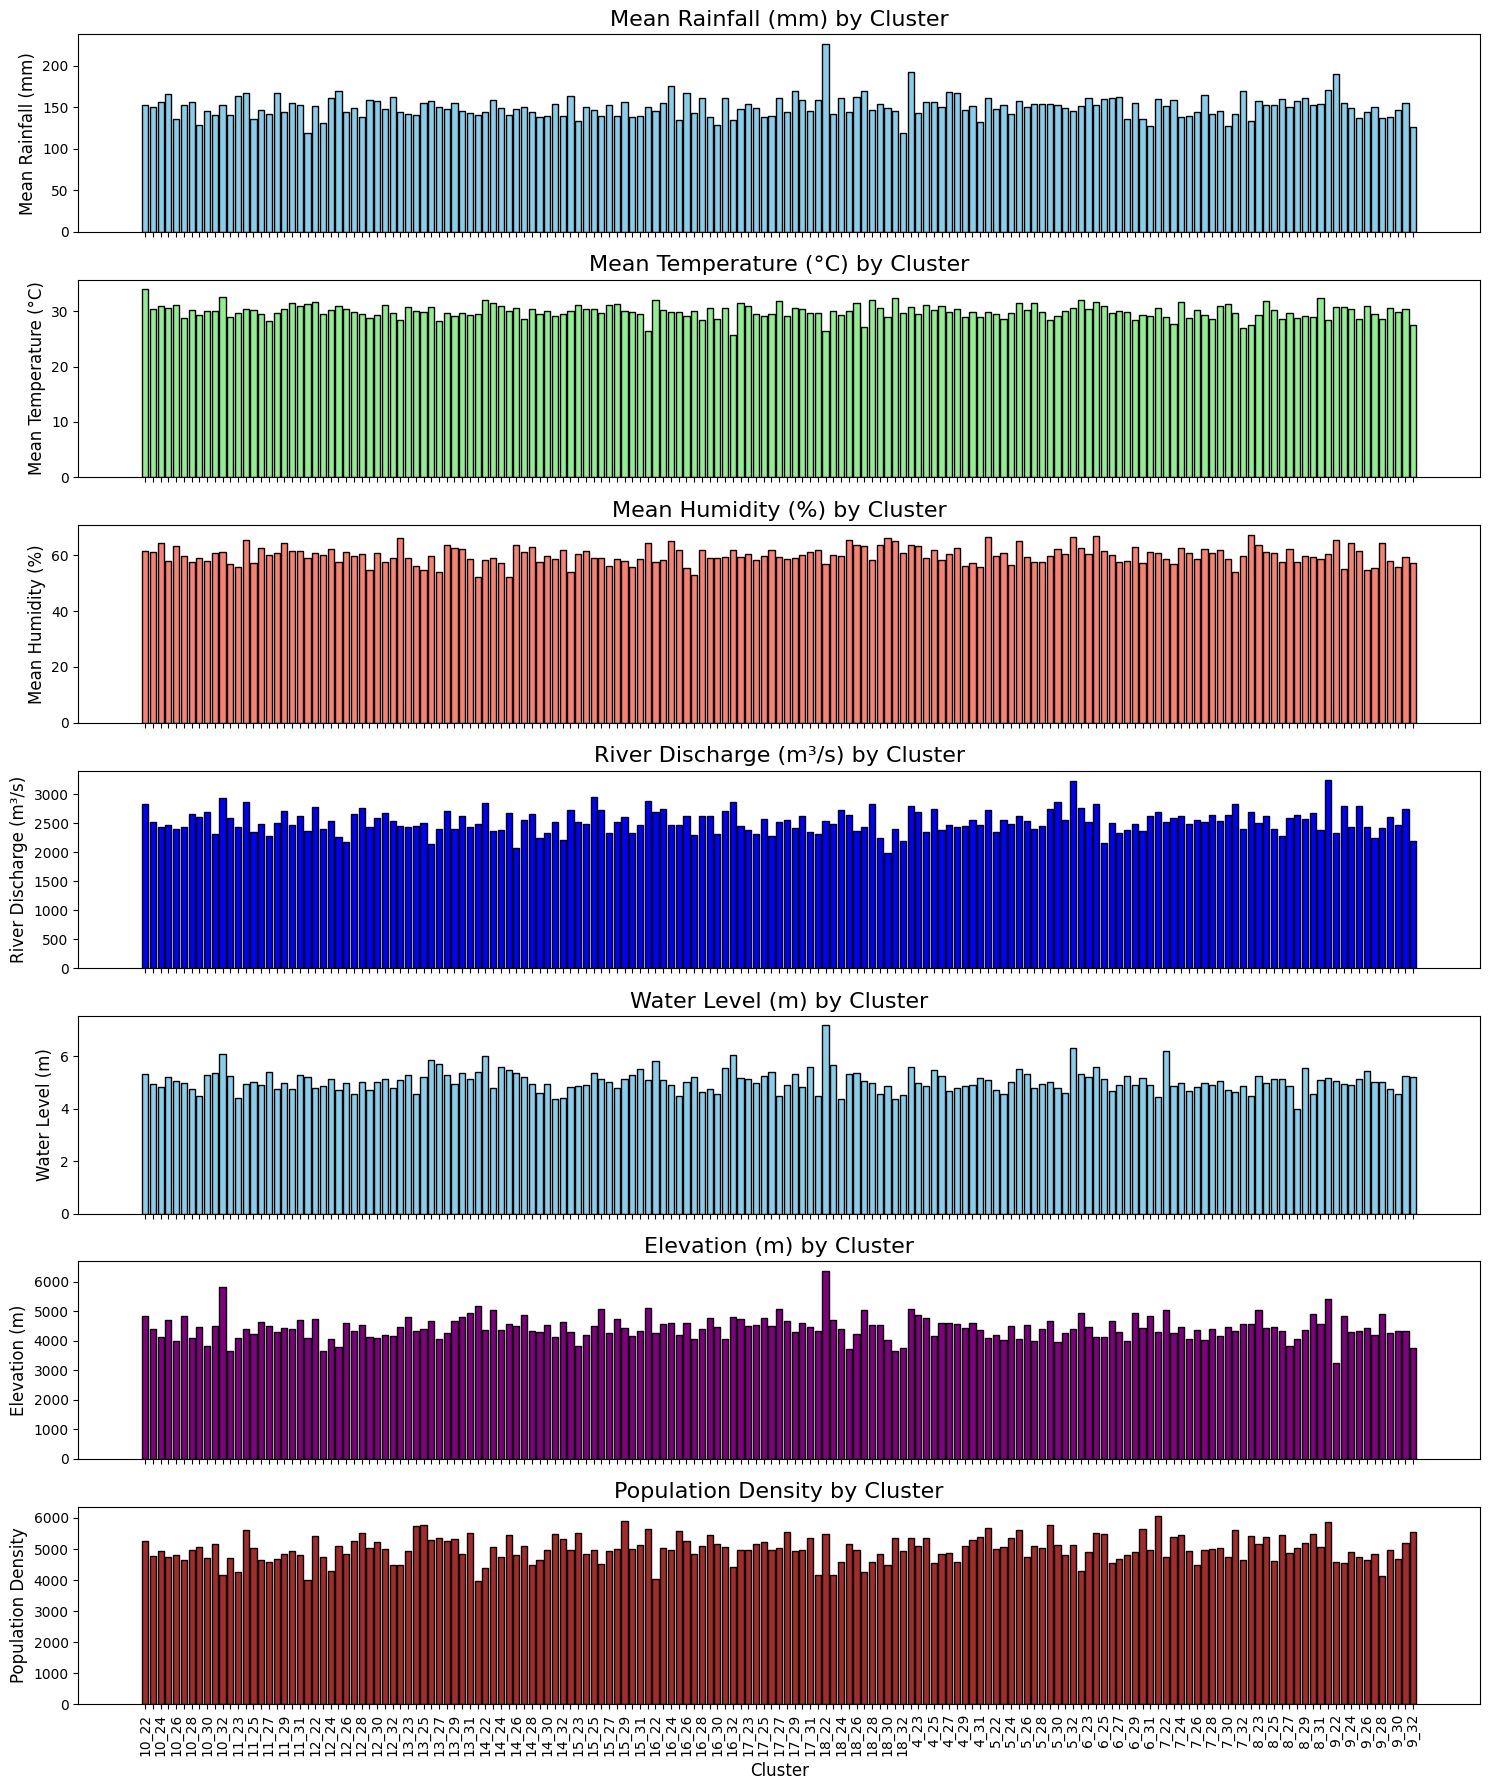

In [ ]:
# Create subplots
fig, axes = plt.subplots(7, 1, figsize=(15, 18), sharex=True)  # Set `sharex=True` to share the x-axis across plots

# Plotting variables
variables = [
    ('Rainfall (mm)', 'Mean Rainfall (mm)', 'skyblue'),
    ('Temperature (°C)', 'Mean Temperature (°C)', 'lightgreen'),
    ('Humidity (%)', 'Mean Humidity (%)', 'salmon'),
    ('River Discharge (m³/s)', 'River Discharge (m³/s)', 'blue'),
    ('Water Level (m)', 'Water Level (m)', 'skyblue'),
    ('Elevation (m)', 'Elevation (m)', 'purple'),
    ('Population Density', 'Population Density', 'brown')
]

# Iterate over variables and plot each on its subplot
for i, (col, title, color) in enumerate(variables):
    axes[i].bar(grouped_clusters['Cluster'], grouped_clusters[col], color=color, edgecolor='black')
    axes[i].set_title(f'{title} by Cluster', fontsize=16)
    axes[i].set_ylabel(title, fontsize=12)

    # Customize x-axis tick labels to show every 2nd cluster
    clusters = grouped_clusters['Cluster']
    ticks = [label if idx % 2 == 0 else "" for idx, label in enumerate(clusters)]  # Show every 2nd cluster label
    axes[i].set_xticks(range(len(clusters)))  # Set the x-ticks
    axes[i].set_xticklabels(ticks, rotation=90, fontsize=10)

# Add xlabel to the last subplot for clarity
axes[-1].set_xlabel('Cluster', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


Let's identify the top 3 clusters which have the biggest mean rainfall value:

In [ ]:
# Sort the clusters by mean Rainfall (mm) in descending order
top_clusters = grouped_clusters.sort_values(by='Rainfall (mm)', ascending=False).head(3)

# Display the top 3 clusters with the highest mean rainfall values
print("Top 3 clusters with the highest mean rainfall values:")
top_clusters


Top 3 clusters with the highest mean rainfall values:


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred
88,18_22,226.480735,26.474787,56.662243,2528.721117,7.180193,6373.956209,"{'Desert': 2, 'Water Body': 2, 'Forest': 1, 'U...","{'Clay': 3, 'Loam': 2, 'Peat': 1}",5497.411374,"{1: 4, 0: 2}","{1: 4, 0: 2}"
99,4_22,192.922062,30.834257,63.737806,2797.292261,5.607543,5090.008429,"{'Urban': 9, 'Agricultural': 6, 'Forest': 4, '...","{'Silt': 9, 'Loam': 5, 'Peat': 5, 'Clay': 4, '...",5370.208039,"{0: 13, 1: 13}","{1: 14, 0: 12}"
154,9_22,189.492246,30.763737,65.294989,2338.093793,5.053897,3245.698277,"{'Water Body': 7, 'Desert': 7, 'Forest': 5, 'U...","{'Peat': 8, 'Loam': 5, 'Clay': 4, 'Silt': 4, '...",4590.858328,"{0: 15, 1: 9}","{1: 14, 0: 10}"


**REMINDER**: clusters are defined according to the grid size (every 2° for latitude and every 3° for longitude).



In [ ]:
# Define the top 3 clusters and their indices
top_3_clusters = ['18_22', '4_22', '9_22']  # Replace with actual top 3 cluster names if different

# Grid size
lat_grid_size = 2.0
lon_grid_size = 3.0

# Function to calculate latitude and longitude ranges
def calculate_ranges(cluster):
    lat_idx, lon_idx = map(int, cluster.split('_'))  # Split cluster into latitude and longitude indices
    lat_range = f"{lat_idx*2}° to {lat_idx*2 + lat_grid_size-1:.0f}°"
    lon_range = f"{lon_idx*3}° to {lon_idx*3 + lon_grid_size-1:.0f}°"
    return lat_range, lon_range

# Create DataFrame for top 3 clusters
cluster_data = []
for cluster in top_3_clusters:
    lat_range, lon_range = calculate_ranges(cluster)
    cluster_data.append({
        'Cluster': cluster,
        'Latitude Range': lat_range,
        'Longitude Range': lon_range
    })

# Convert to DataFrame
cluster_df = pd.DataFrame(cluster_data)

# Display the DataFrame
cluster_df


,Cluster,Latitude Range,Longitude Range
0,18_22,36° to 37°,66° to 68°
1,4_22,8° to 9°,66° to 68°
2,9_22,18° to 19°,66° to 68°


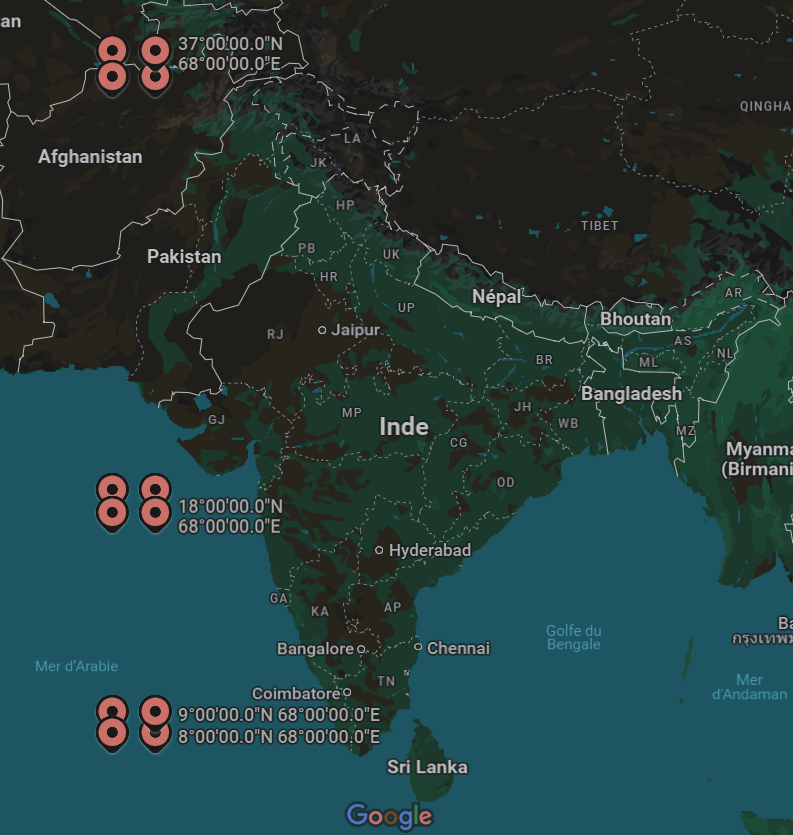

In [ ]:
from IPython.display import Image
Image(filename='Project/top_3_clusters.png')

**IMPORTANT NOTE:** The coordiantes are not located in India, because the records seem to be set with a grid (area) which delimits India. And because we cannot consider India as a rectangle (in order to restrict the studied area to the country), we need to keep these records even they do not directly belong to the country. Nevertheless, we can still make observations based on them.

In [ ]:
# Sort the clusters by mean Rainfall (mm) in descending order
tail_clusters = grouped_clusters.sort_values(by='Rainfall (mm)', ascending=False).tail(3)

# Display the top 3 clusters with the highest mean rainfall values
print("Top 3 clusters with the smallest mean rainfall values:")
tail_clusters

Top 3 clusters with the smallest mean rainfall values:


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred
164,9_32,126.456127,27.587993,57.077643,2192.523354,5.227024,3748.654492,"{'Forest': 10, 'Water Body': 9, 'Desert': 4, '...","{'Loam': 13, 'Peat': 8, 'Clay': 5, 'Sandy': 3,...",5554.393452,"{1: 19, 0: 12}","{1: 17, 0: 14}"
21,11_32,119.441258,31.250234,59.021028,2372.925860,5.212849,4081.996754,"{'Urban': 9, 'Water Body': 9, 'Forest': 6, 'De...","{'Clay': 9, 'Silt': 7, 'Loam': 5, 'Sandy': 5, ...",4000.063628,"{1: 16, 0: 15}","{0: 17, 1: 14}"
98,18_32,119.083916,29.625204,60.624590,2190.258269,4.523387,3745.030242,"{'Desert': 5, 'Agricultural': 3, 'Water Body':...","{'Peat': 5, 'Sandy': 5, 'Silt': 4, 'Loam': 1}",4952.219257,"{0: 9, 1: 6}","{1: 9, 0: 6}"


In [ ]:
# Define the top 3 clusters and their indices
last_3_clusters = ['9_32', '11_32', '18_32']  # Replace with actual top 3 cluster names if different

# Grid size
lat_grid_size = 2.0
lon_grid_size = 3.0

# Function to calculate latitude and longitude ranges
def calculate_ranges(cluster):
    lat_idx, lon_idx = map(int, cluster.split('_'))  # Split cluster into latitude and longitude indices
    lat_range = f"{lat_idx*2}° to {lat_idx*2 + lat_grid_size-1:.0f}°"
    lon_range = f"{lon_idx*3}° to {lon_idx*3 + lon_grid_size-1:.0f}°"
    return lat_range, lon_range

# Create DataFrame for top 3 clusters
cluster_data = []
for cluster in last_3_clusters:
    lat_range, lon_range = calculate_ranges(cluster)
    cluster_data.append({
        'Cluster': cluster,
        'Latitude Range': lat_range,
        'Longitude Range': lon_range
    })

# Convert to DataFrame
cluster_df2 = pd.DataFrame(cluster_data)

# Display the DataFrame
cluster_df2


,Cluster,Latitude Range,Longitude Range
0,9_32,18° to 19°,96° to 98°
1,11_32,22° to 23°,96° to 98°
2,18_32,36° to 37°,96° to 98°


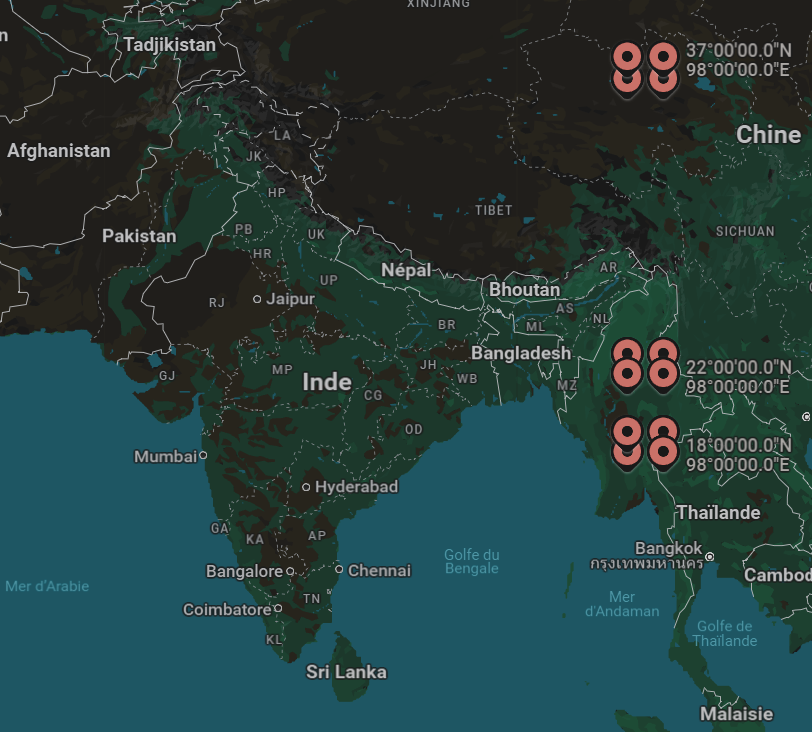

In [ ]:
from IPython.display import Image
Image(filename='Project/last_3_clusters.png')

**IMPORTANT NOTE:** The coordiantes are not located in India, because the records seem to be set with a grid (area) which delimits India. And because we cannot consider India as a rectangle (in order to restrict the studied area to the country), we need to keep these records even they do not directly belong to the country. Nevertheless, we can still make observations based on them.

In [ ]:
top_3_clusters = grouped_clusters.nlargest(3, 'Rainfall (mm)')

def format_dict_column(dictionary):
    """
    Converts a dictionary into a multiline string for display purposes.
    Example:
    {'Clay': 3, 'Loam': 2, 'Peat': 1} -> "Clay: 3\nLoam: 2\nPeat: 1"
    """
    return ','.join(f'{key}: {value}' for key, value in dictionary.items())

# Make a copy of the top 3 clusters for display formatting
formatted_clusters = top_3_clusters.copy()

# Apply the formatting function to the relevant columns
columns_to_format = ['Land Cover', 'Soil Type', 'Infrastructure', 'Flood Occurred']
for column in columns_to_format:
    formatted_clusters[column] = formatted_clusters[column].apply(format_dict_column)

# Display the formatted DataFrame
formatted_clusters_display = formatted_clusters[[
    'Cluster', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
    'Land Cover', 'Soil Type', 'Infrastructure', 'Flood Occurred'
]]

# Convert 'Land Cover' dictionaries into a readable DataFrame
land_cover_details = []

for _, row in top_3_clusters.iterrows():
    cluster_id = row['Cluster']
    land_cover_dict = row['Land Cover']
    for land_cover, count in land_cover_dict.items():
        land_cover_details.append({
            'Cluster': cluster_id,
            'Land Cover Type': land_cover,
            'Count': count
        })

# Create a new DataFrame for Land Cover details
land_cover_df = pd.DataFrame(land_cover_details)

# Display the DataFrame
print(land_cover_df)


# Show the formatted DataFrame
formatted_clusters_display

   Cluster Land Cover Type  Count
0    18_22          Desert      2
1    18_22      Water Body      2
2    18_22          Forest      1
3    18_22           Urban      1
4     4_22           Urban      9
5     4_22    Agricultural      6
6     4_22          Forest      4
7     4_22      Water Body      4
8     4_22          Desert      3
9     9_22      Water Body      7
10    9_22          Desert      7
11    9_22          Forest      5
12    9_22           Urban      3
13    9_22    Agricultural      2


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),Land Cover,Soil Type,Infrastructure,Flood Occurred
88,18_22,226.480735,26.474787,56.662243,"Desert: 2,Water Body: 2,Forest: 1,Urban: 1","Clay: 3,Loam: 2,Peat: 1","1: 4,0: 2","1: 4,0: 2"
99,4_22,192.922062,30.834257,63.737806,"Urban: 9,Agricultural: 6,Forest: 4,Water Body:...","Silt: 9,Loam: 5,Peat: 5,Clay: 4,Sandy: 3","0: 13,1: 13","1: 14,0: 12"
154,9_22,189.492246,30.763737,65.294989,"Water Body: 7,Desert: 7,Forest: 5,Urban: 3,Agr...","Peat: 8,Loam: 5,Clay: 4,Silt: 4,Sandy: 3","0: 15,1: 9","1: 14,0: 10"


In [ ]:
last_3_clusters = grouped_clusters.nsmallest(3, 'Rainfall (mm)')

def format_dict_column(dictionary):
    """
    Converts a dictionary into a multiline string for display purposes.
    Example:
    {'Clay': 3, 'Loam': 2, 'Peat': 1} -> "Clay: 3\nLoam: 2\nPeat: 1"
    """
    return ','.join(f'{key}: {value}' for key, value in dictionary.items())

# Make a copy of the top 3 clusters for display formatting
formatted_clusters = last_3_clusters.copy()

# Apply the formatting function to the relevant columns
columns_to_format = ['Land Cover', 'Soil Type', 'Infrastructure', 'Flood Occurred']
for column in columns_to_format:
    formatted_clusters[column] = formatted_clusters[column].apply(format_dict_column)

# Display the formatted DataFrame
formatted_clusters_display = formatted_clusters[[
    'Cluster', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
    'Land Cover', 'Soil Type', 'Infrastructure', 'Flood Occurred'
]]

# Convert 'Land Cover' dictionaries into a readable DataFrame
land_cover_details = []

for _, row in last_3_clusters.iterrows():
    cluster_id = row['Cluster']
    land_cover_dict = row['Land Cover']
    for land_cover, count in land_cover_dict.items():
        land_cover_details.append({
            'Cluster': cluster_id,
            'Land Cover Type': land_cover,
            'Count': count
        })

# Create a new DataFrame for Land Cover details
land_cover_df2 = pd.DataFrame(land_cover_details)

# Display the DataFrame
print(land_cover_df2)


# Show the formatted DataFrame
formatted_clusters_display

   Cluster Land Cover Type  Count
0    18_32          Desert      5
1    18_32    Agricultural      3
2    18_32      Water Body      3
3    18_32          Forest      2
4    18_32           Urban      2
5    11_32           Urban      9
6    11_32      Water Body      9
7    11_32          Forest      6
8    11_32          Desert      4
9    11_32    Agricultural      3
10    9_32          Forest     10
11    9_32      Water Body      9
12    9_32          Desert      4
13    9_32           Urban      4
14    9_32    Agricultural      4


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),Land Cover,Soil Type,Infrastructure,Flood Occurred
98,18_32,119.083916,29.625204,60.624590,"Desert: 5,Agricultural: 3,Water Body: 3,Forest...","Peat: 5,Sandy: 5,Silt: 4,Loam: 1","0: 9,1: 6","1: 9,0: 6"
21,11_32,119.441258,31.250234,59.021028,"Urban: 9,Water Body: 9,Forest: 6,Desert: 4,Agr...","Clay: 9,Silt: 7,Loam: 5,Sandy: 5,Peat: 5","1: 16,0: 15","0: 17,1: 14"
164,9_32,126.456127,27.587993,57.077643,"Forest: 10,Water Body: 9,Desert: 4,Urban: 4,Ag...","Loam: 13,Peat: 8,Clay: 5,Sandy: 3,Silt: 2","1: 19,0: 12","1: 17,0: 14"


In [ ]:
# Count the total number of 0s and 1s for Flood Occurred
grouped_clusters['Flood YES'] = grouped_clusters['Flood Occurred'].apply(lambda x: x.get(1, 0))  # Count of 1s
grouped_clusters['Flood NO'] = grouped_clusters['Flood Occurred'].apply(lambda x: x.get(0, 0))   # Count of 0s

# Calculate Total Floods
grouped_clusters['Total Floods'] = grouped_clusters['Flood YES'] + grouped_clusters['Flood NO']

# Calculate percentages for Flood YES and Flood NO
grouped_clusters['Flood YES (%)'] = (grouped_clusters['Flood YES'] / grouped_clusters['Total Floods']) * 100
grouped_clusters['Flood NO (%)'] = (grouped_clusters['Flood NO'] / grouped_clusters['Total Floods']) * 100

grouped_clusters



,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred,Total Floods,Flood YES,Flood NO,Flood YES (%),Flood NO (%)
0,10_22,152.780491,33.991133,61.455327,2835.066493,5.324289,4831.166828,"{'Agricultural': 5, 'Forest': 5, 'Water Body':...","{'Loam': 6, 'Sandy': 4, 'Silt': 4, 'Clay': 2, ...",5247.691122,"{0: 10, 1: 8}","{1: 12, 0: 6}",18,12,6,66.666667,33.333333
1,10_23,150.410756,30.413560,61.085723,2513.651039,4.943171,4401.433924,"{'Desert': 20, 'Agricultural': 13, 'Urban': 12...","{'Silt': 15, 'Sandy': 14, 'Loam': 14, 'Clay': ...",4769.670257,"{0: 34, 1: 29}","{1: 41, 0: 22}",63,41,22,65.079365,34.920635
2,10_24,156.955258,31.036730,64.485924,2434.698203,4.815336,4114.742655,"{'Agricultural': 24, 'Forest': 15, 'Desert': 1...","{'Peat': 19, 'Silt': 16, 'Clay': 16, 'Loam': 1...",4935.416951,"{0: 44, 1: 30}","{0: 38, 1: 36}",74,36,38,48.648649,51.351351
3,10_25,165.778397,30.552950,58.040415,2461.455943,5.199280,4695.429857,"{'Forest': 17, 'Urban': 15, 'Desert': 14, 'Agr...","{'Silt': 18, 'Clay': 14, 'Peat': 14, 'Loam': 1...",4728.079552,"{1: 38, 0: 30}","{1: 35, 0: 33}",68,35,33,51.470588,48.529412
4,10_26,135.442987,31.172201,63.182815,2400.122120,5.073548,3987.840172,"{'Desert': 21, 'Agricultural': 21, 'Urban': 18...","{'Sandy': 21, 'Clay': 18, 'Loam': 17, 'Silt': ...",4799.567194,"{0: 47, 1: 40}","{0: 45, 1: 42}",87,42,45,48.275862,51.724138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,9_28,136.815522,28.675888,64.229721,2410.194589,5.026985,4919.441735,"{'Forest': 21, 'Desert': 13, 'Water Body': 12,...","{'Loam': 16, 'Peat': 16, 'Sandy': 12, 'Clay': ...",4124.679862,"{1: 34, 0: 29}","{1: 38, 0: 25}",63,38,25,60.317460,39.682540
161,9_29,137.909118,30.547996,57.838678,2609.141869,4.762190,4250.092645,"{'Forest': 19, 'Desert': 18, 'Agricultural': 1...","{'Loam': 18, 'Clay': 18, 'Sandy': 17, 'Peat': ...",4965.926846,"{1: 43, 0: 36}","{1: 40, 0: 39}",79,40,39,50.632911,49.367089
162,9_30,147.210762,29.809254,55.671664,2474.448366,4.550173,4344.567589,"{'Agricultural': 17, 'Desert': 17, 'Water Body...","{'Peat': 21, 'Clay': 15, 'Silt': 14, 'Loam': 1...",4673.346890,"{1: 45, 0: 33}","{1: 46, 0: 32}",78,46,32,58.974359,41.025641
163,9_31,155.697929,30.452806,59.227373,2739.293352,5.230184,4320.123153,"{'Water Body': 17, 'Urban': 15, 'Agricultural'...","{'Loam': 15, 'Clay': 15, 'Sandy': 14, 'Silt': ...",5194.027507,"{1: 40, 0: 26}","{1: 34, 0: 32}",66,34,32,51.515152,48.484848


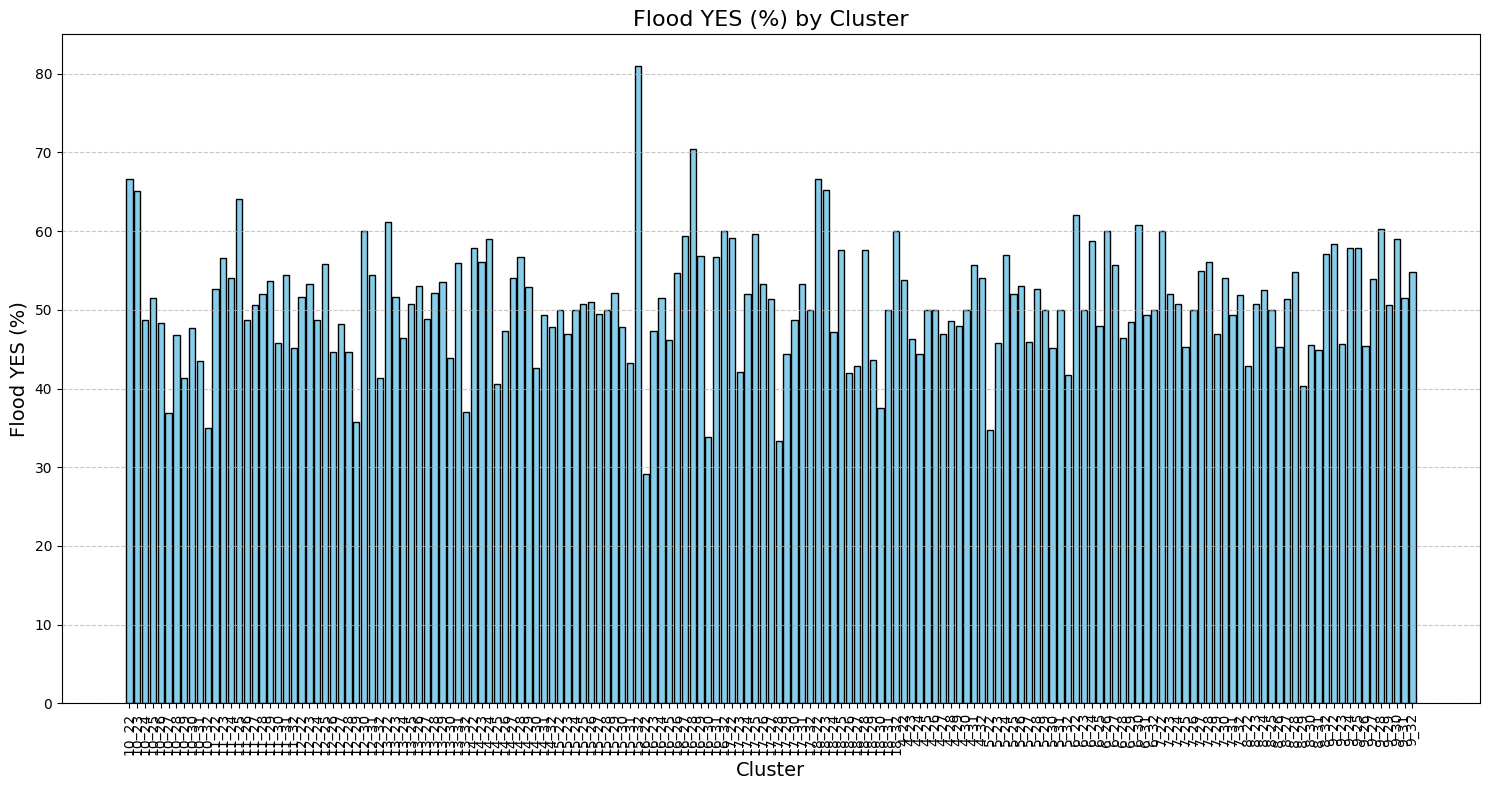

In [ ]:
# Plot Flood YES (%) for each cluster
plt.figure(figsize=(15, 8))
plt.bar(grouped_clusters['Cluster'], grouped_clusters['Flood YES (%)'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Flood YES (%) by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Flood YES (%)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Sort the DataFrame by 'Flood YES (%)' in descending order
sorted_clusters = grouped_clusters.sort_values(by='Flood YES (%)', ascending=False)

# Step 2: Filter the sorted DataFrame where 'Flood YES (%)' is greater than 50%
flood_yes_above_50_sorted = sorted_clusters[sorted_clusters['Flood YES (%)'] > 50]

# Step 3: Display the filtered clusters
print("Clusters sorted by 'Flood YES (%)' and filtered for values greater than 50%:")
flood_yes_above_50_sorted


Clusters sorted by 'Flood YES (%)' and filtered for values greater than 50%:


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred,Total Floods,Flood YES,Flood NO,Flood YES (%),Flood NO (%)
65,15_32,149.905119,26.506692,64.291434,2883.461214,5.091753,5111.101108,"{'Desert': 7, 'Water Body': 4, 'Agricultural':...","{'Peat': 7, 'Clay': 4, 'Sandy': 4, 'Silt': 3, ...",5645.903180,"{1: 13, 0: 8}","{1: 17, 0: 4}",21,17,4,80.952381,19.047619
72,16_28,161.635920,28.346090,61.920667,2630.558551,4.638044,4397.705126,"{'Desert': 15, 'Forest': 11, 'Water Body': 11,...","{'Silt': 13, 'Sandy': 12, 'Peat': 11, 'Clay': ...",5104.314375,"{0: 27, 1: 27}","{1: 38, 0: 16}",54,38,16,70.370370,29.629630
0,10_22,152.780491,33.991133,61.455327,2835.066493,5.324289,4831.166828,"{'Agricultural': 5, 'Forest': 5, 'Water Body':...","{'Loam': 6, 'Sandy': 4, 'Silt': 4, 'Clay': 2, ...",5247.691122,"{0: 10, 1: 8}","{1: 12, 0: 6}",18,12,6,66.666667,33.333333
88,18_22,226.480735,26.474787,56.662243,2528.721117,7.180193,6373.956209,"{'Desert': 2, 'Water Body': 2, 'Forest': 1, 'U...","{'Clay': 3, 'Loam': 2, 'Peat': 1}",5497.411374,"{1: 4, 0: 2}","{1: 4, 0: 2}",6,4,2,66.666667,33.333333
89,18_23,142.106885,29.967227,59.991113,2484.771027,5.648874,4718.217042,"{'Agricultural': 8, 'Forest': 4, 'Water Body':...","{'Peat': 6, 'Loam': 5, 'Clay': 4, 'Silt': 4, '...",4154.697311,"{0: 14, 1: 9}","{1: 15, 0: 8}",23,15,8,65.217391,34.782609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,7_24,138.122561,31.592851,62.635612,2627.449438,4.997729,4483.635628,"{'Water Body': 16, 'Urban': 15, 'Forest': 13, ...","{'Clay': 20, 'Peat': 15, 'Silt': 14, 'Loam': 1...",5459.729023,"{0: 35, 1: 34}","{1: 35, 0: 34}",69,35,34,50.724638,49.275362
144,8_23,157.087531,29.300252,63.467441,2503.023741,5.255123,5037.916835,"{'Forest': 22, 'Desert': 14, 'Water Body': 13,...","{'Loam': 17, 'Sandy': 16, 'Clay': 14, 'Peat': ...",5171.864787,"{1: 39, 0: 30}","{1: 35, 0: 34}",69,35,34,50.724638,49.275362
58,15_25,147.031587,30.353479,58.867911,2952.374852,5.372339,4496.070494,"{'Agricultural': 21, 'Urban': 16, 'Forest': 14...","{'Loam': 17, 'Silt': 16, 'Sandy': 14, 'Clay': ...",4972.921082,"{0: 47, 1: 26}","{1: 37, 0: 36}",73,37,36,50.684932,49.315068
161,9_29,137.909118,30.547996,57.838678,2609.141869,4.762190,4250.092645,"{'Forest': 19, 'Desert': 18, 'Agricultural': 1...","{'Loam': 18, 'Clay': 18, 'Sandy': 17, 'Peat': ...",4965.926846,"{1: 43, 0: 36}","{1: 40, 0: 39}",79,40,39,50.632911,49.367089


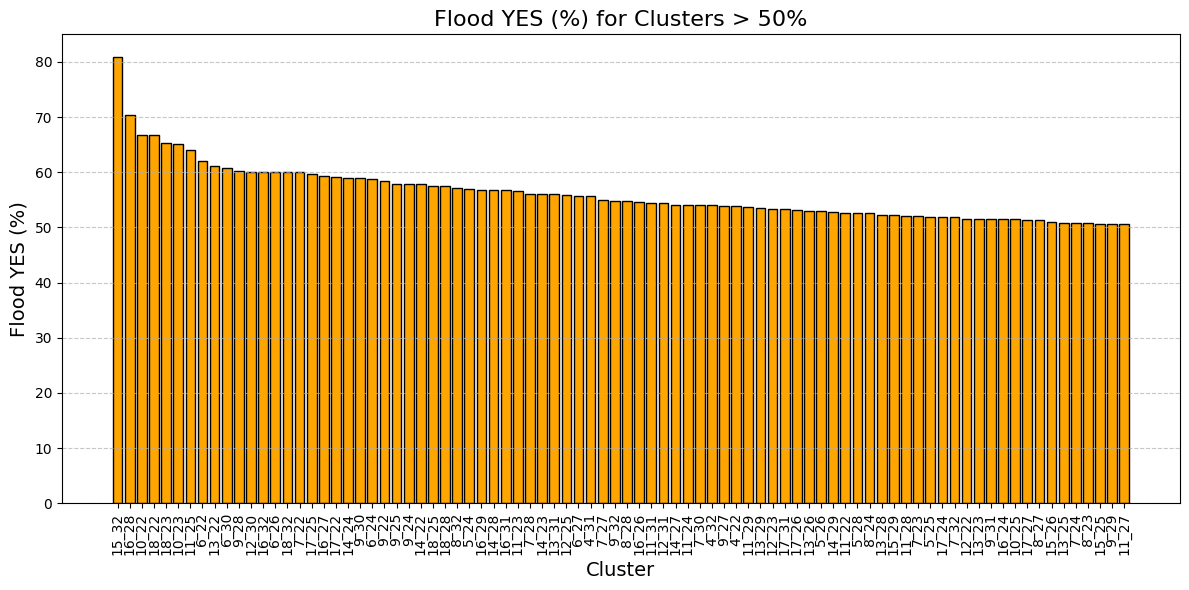

In [ ]:
# Plot Flood YES (%) for clusters where Flood YES (%) > 50%
plt.figure(figsize=(12, 6))
plt.bar(flood_yes_above_50_sorted['Cluster'], flood_yes_above_50_sorted['Flood YES (%)'], color='orange', edgecolor='black')

# Add titles and labels
plt.title('Flood YES (%) for Clusters > 50%', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Flood YES (%)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Get the top 5 clusters with the highest Flood YES (%) from the filtered DataFrame
top_5_flood_yes_clusters = flood_yes_above_50_sorted.head(5)
top_5_flood_yes_clusters


,Cluster,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Flood Occurred,Total Floods,Flood YES,Flood NO,Flood YES (%),Flood NO (%)
65,15_32,149.905119,26.506692,64.291434,2883.461214,5.091753,5111.101108,"{'Desert': 7, 'Water Body': 4, 'Agricultural':...","{'Peat': 7, 'Clay': 4, 'Sandy': 4, 'Silt': 3, ...",5645.903180,"{1: 13, 0: 8}","{1: 17, 0: 4}",21,17,4,80.952381,19.047619
72,16_28,161.635920,28.346090,61.920667,2630.558551,4.638044,4397.705126,"{'Desert': 15, 'Forest': 11, 'Water Body': 11,...","{'Silt': 13, 'Sandy': 12, 'Peat': 11, 'Clay': ...",5104.314375,"{0: 27, 1: 27}","{1: 38, 0: 16}",54,38,16,70.370370,29.629630
0,10_22,152.780491,33.991133,61.455327,2835.066493,5.324289,4831.166828,"{'Agricultural': 5, 'Forest': 5, 'Water Body':...","{'Loam': 6, 'Sandy': 4, 'Silt': 4, 'Clay': 2, ...",5247.691122,"{0: 10, 1: 8}","{1: 12, 0: 6}",18,12,6,66.666667,33.333333
88,18_22,226.480735,26.474787,56.662243,2528.721117,7.180193,6373.956209,"{'Desert': 2, 'Water Body': 2, 'Forest': 1, 'U...","{'Clay': 3, 'Loam': 2, 'Peat': 1}",5497.411374,"{1: 4, 0: 2}","{1: 4, 0: 2}",6,4,2,66.666667,33.333333
89,18_23,142.106885,29.967227,59.991113,2484.771027,5.648874,4718.217042,"{'Agricultural': 8, 'Forest': 4, 'Water Body':...","{'Peat': 6, 'Loam': 5, 'Clay': 4, 'Silt': 4, '...",4154.697311,"{0: 14, 1: 9}","{1: 15, 0: 8}",23,15,8,65.217391,34.782609


In [ ]:
# Assuming top_5_flood_yes_clusters is a DataFrame with a 'Cluster' column
top_5_clusters = flood_yes_above_50_sorted.head(5)['Cluster']  # Extract top 5 cluster names

# Grid size
lat_grid_size = 2.0
lon_grid_size = 3.0

# Function to calculate latitude and longitude ranges
def calculate_ranges(cluster):
    lat_idx, lon_idx = map(int, cluster.split('_'))  # Split cluster into latitude and longitude indices
    lat_range = f"{lat_idx*2}° to {lat_idx*2 + lat_grid_size - 1:.0f}°"
    lon_range = f"{lon_idx*3}° to {lon_idx*3 + lon_grid_size - 1:.0f}°"
    return lat_range, lon_range

# Create DataFrame for top 5 clusters
cluster_data = []
for cluster in top_5_clusters:
    lat_range, lon_range = calculate_ranges(cluster)
    cluster_data.append({
        'Cluster': cluster,
        'Latitude Range': lat_range,
        'Longitude Range': lon_range
    })

# Convert to DataFrame
coord_top_5_yes_clusters = pd.DataFrame(cluster_data)

# Display the DataFrame
coord_top_5_yes_clusters


,Cluster,Latitude Range,Longitude Range
0,15_32,30° to 31°,96° to 98°
1,16_28,32° to 33°,84° to 86°
2,10_22,20° to 21°,66° to 68°
3,18_22,36° to 37°,66° to 68°
4,18_23,36° to 37°,69° to 71°


## **ANALYSIS**

Among the data we retrieved, we can say several things.<br><br>
First, floods are the most important during summer (Indian monsoon), where the temperature and humidity are high (around 30°C and 60% of humidity). For instance, on the cluster 18_22, we can observe that on 6 records, there were 4 floods, whereas for 4 of them they were equipped with flood preventing infrastructures. This observation is also confirmed on the other records. Therefore, we can deduce that these countermeasures are not sufficient to prevent floods. <br><br>
Secondly, rainfalls are not the only criteria to take into account for measuring floods. Indeed, the top 3 clusters have almost two times more rainfalls (around 20 mm) than the last 3 clusters (around 120mm). However, there are as much as floods in the two groups of clusters. Their common features are the temperature and humidity which are approximately the same, confirming again the argument above.


## **STEP 5: FINAL CLEANING AND CLUSTERING**

In [ ]:
new_data = data.drop(['ANNUAL', 'FLOODS'], axis=1)
new_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4230,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4231,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4232,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


In [ ]:
# prompt: Using dataframe data: Imputate NA value in data

import pandas as pd
# Iterate over each column of the dataframe
for col in new_data.columns:
    # Check if the column has missing values
    if new_data[col].isnull().any():
        # If the column is numeric
        if pd.api.types.is_numeric_dtype(new_data[col]):
            # Impute the missing values with the mean of the column
            new_data[col] = new_data[col].fillna(new_data[col].mean())
        # If the column is categorical
        else:
            # Impute the missing values with the most frequent value of the column
            new_data[col] = new_data[col].fillna(new_data[col].mode()[0])

# Print the updated dataframe (optional)
new_data


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4230,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4231,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4232,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


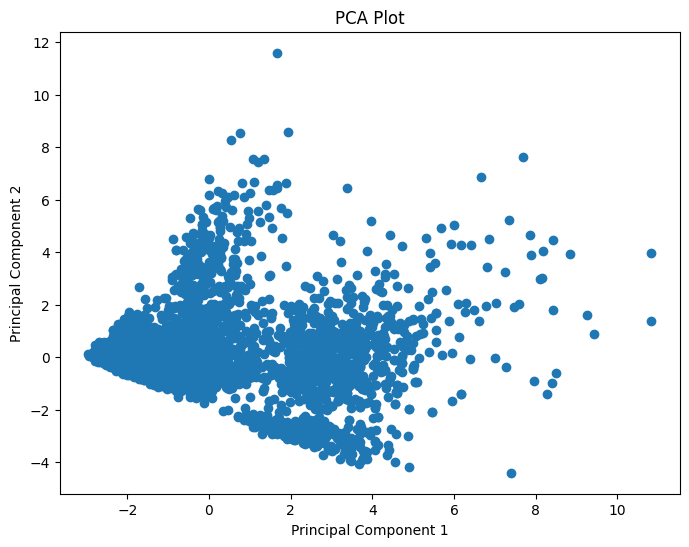

In [ ]:
# prompt: create PCA plot for data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame as defined in the previous code

# Select numerical features for PCA
numerical_features = new_data.select_dtypes(include=np.number)

# Handle missing values (if any) -  replace with mean for this example
numerical_features = numerical_features.fillna(numerical_features.mean())


# Scale the data
x = StandardScaler().fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 principal components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Plot the PCA
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

In [ ]:
# prompt: generate hierarchical clustering for data

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Assuming 'principalDf' is your DataFrame with principal components as calculated in the previous code

# Perform hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(principalDf, method='ward')) # You can change the method if needed
plt.show()

KeyboardInterrupt: 

In [ ]:
da